(1a)

In [32]:

import sympy as sp

t = sp.symbols('t')

N1,N2=sp.Function('N_1')(t),sp.Function('N_2')(t)
V1=2000 #L
V2=1000 #L
R=8.3145e-2 #Lbar/molK
Vin=300 #l/min
P0=1 #bar
T0=300 #K
k=1*60 #mol/min bar
P1,P2=N1*R*T0/V1,N2*R*T0/V2
dN1dt=P0*Vin/(R*T0)-k*(P1-P2)
dN2dt=k*(P1-P2)-k*(P2-P0)
display(dN1dt,dN2dt)

-0.748305*N_1(t) + 1.49661*N_2(t) + 12.0271814300319

0.748305*N_1(t) - 2.99322*N_2(t) + 60

(B)
at t=0 N1=PV/RT=80.181 mol N2=PV/RT=40.09 mol

In [34]:
#C
odematrix=sp.Matrix([dN1dt,dN2dt])
A=odematrix.jacobian([N1,N2])
k=odematrix-A*sp.Matrix([N1,N2])
display(A,k)

Matrix([
[-0.748305,  1.49661],
[ 0.748305, -2.99322]])

Matrix([
[12.0271814300319],
[              60]])

In [40]:
#D
import numpy as np
A=np.array([[0.015,-0.03],[-0.015,0.04]])
k=np.array([[10],[1.5]])
eigenvals, eigenvects = np.linalg.eig(A)
display(eigenvals,eigenvects)

np.linalg.inv(eigenvects)@A@eigenvects


array([0.00287786, 0.05212214])

array([[-0.92716928,  0.62854921],
       [-0.37464267, -0.77776982]])

array([[ 2.87785550e-03, -2.16840434e-19],
       [ 0.00000000e+00,  5.21221445e-02]])

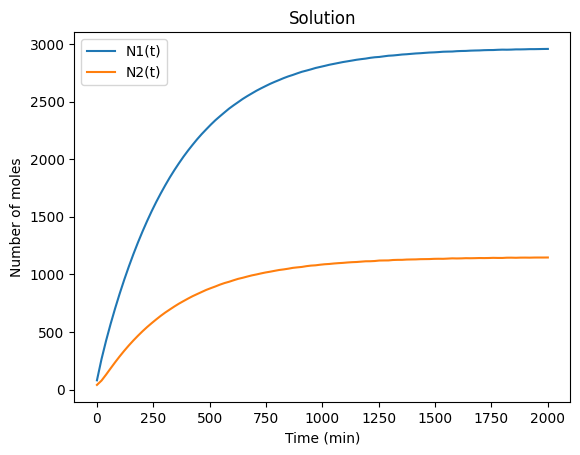

In [43]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def func(t,N):
    N1,N2=N
    T1=-(0.015*N1-0.03*N2)+10
    T2=-(-0.015*N1+0.04*N2)+1.5
    return [T1,T2]
ics=[80.181,40.09]
time=2000
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(func, (0, time), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="N1(t)")
plt.plot(solution.t, solution.y[1], label="N2(t)")
plt.xlabel("Time (min)")
plt.ylabel("Number of moles")
plt.legend()
plt.title("Solution")
plt.show()

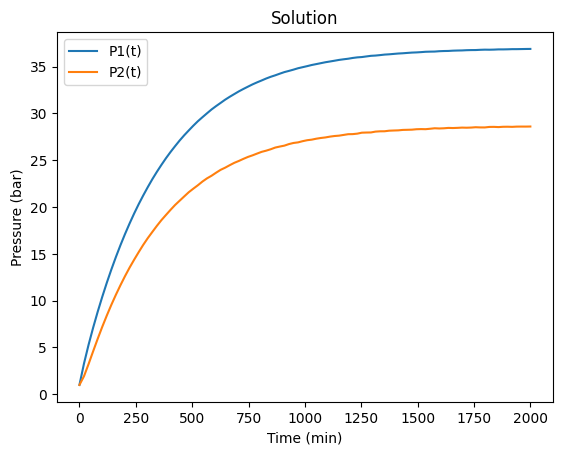

In [44]:
V1, V2 = 2000, 1000
R, T = 8.314e-2, 300

P1 = solution.y[0] * R * T / V1
P2 = solution.y[1] * R * T / V2

plt.plot(solution.t, P1, label="P1(t)")
plt.plot(solution.t, P2, label="P2(t)")
plt.xlabel("Time (min)")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.title("Solution")
plt.show()

Q2

In [33]:
import sympy as sp

r,l,t,L=sp.symbols('r l theta lambda')
f=0.5*r*r*l*(t-sp.sin(t))
g=r*t*l+r*r*(t-sp.sin(t))-20

x,y,z=f.diff(r)-L*g.diff(r),f.diff(l)-L*g.diff(l),f.diff(t)-L*g.diff(t)
display(x,y,z)
theta=sp.pi
R = sp.solve(y.subs(t,theta),r)[1]
le =sp.solve(x.subs(r,R).subs(t,theta),l)[0]
display(theta,R,le)

1.0*l*r*(theta - sin(theta)) - lambda*(l*theta + 2*r*(theta - sin(theta)))

-lambda*r*theta + 0.5*r**2*(theta - sin(theta))

0.5*l*r**2*(1 - cos(theta)) - lambda*(l*r + r**2*(1 - cos(theta)))

pi

2.0*lambda

4.0*lambda

In [59]:
lam=sp.solve(g.subs(r,R).subs(t,theta).subs(l,le),L)[1]

In [64]:
rad = sp.solve(y.subs(t,theta).subs(L,lam),r)[1]

In [67]:
length=sp.solve(z.subs(r,rad).subs(t,theta).subs(L,lam),l)[0]

In [68]:
display(theta,rad,length)

pi

1.45673124078944

2.91346248157887

x = r * cos(θ)
y = r * sin(θ)

In [75]:
x,y=sp.symbols('x,y')
Area=sp.sqrt(x*x+y*y)
r,t =sp.symbols('r theta')

M=sp.integrate(Area.subs(x,r*sp.cos(t)).subs(y,r*sp.sin(t)),(r,5,6),(t,0,2*sp.pi))
display(M)

11*pi

In [90]:
I=sp.integrate(r*r*Area.subs(x,r*sp.cos(t)).subs(y,r*sp.sin(t)),(r,5,6),(t,0,2*sp.pi))
display(I)

671*pi/2

In [97]:
A=sp.series(sp.log(1+x*x),n=10)

In [96]:
B=sp.series(sp.sin(2*x),n=10)

In [89]:
sp.series((2*sp.log(1+x*x))/(x*sp.sin(2*x)+3*x*x),n=10)

2/5 - 7*x**2/75 + 98*x**4/1125 - 16481*x**6/236250 + 33172*x**8/590625 + O(x**10)

as x->0 =>2/5